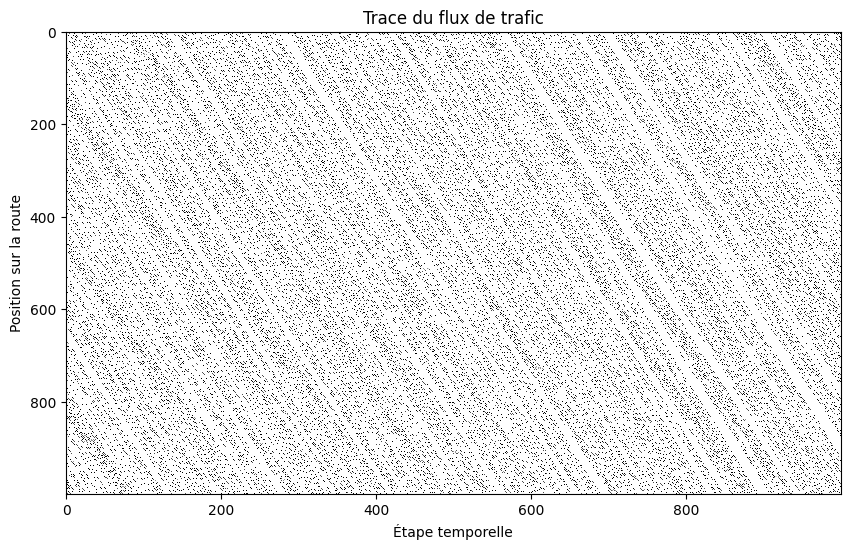

Distance totale parcourue pour k=50: 262412


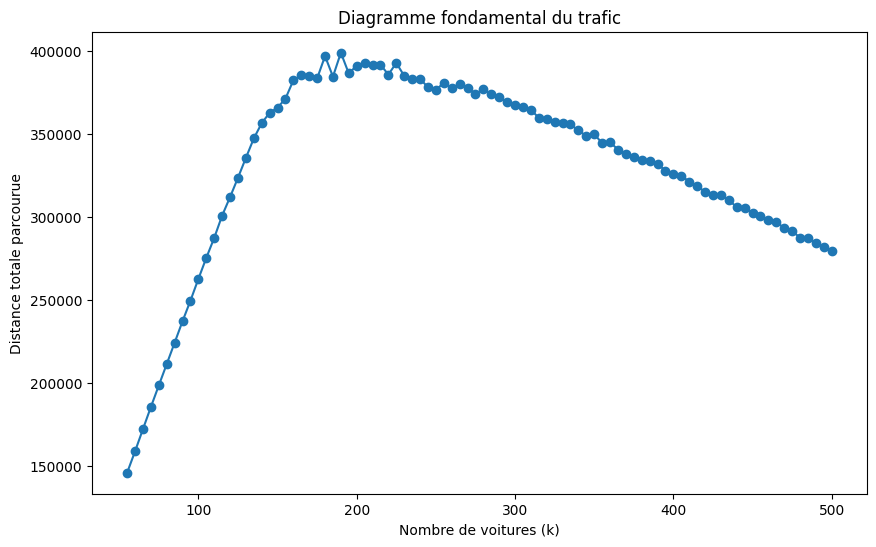

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def initialiser_route(M, k):
    # Initialisatin des demarche
    route = -np.ones(M, dtype=int)  # -1 signifie qu'il n'y a pas de voiture sur cette section
    positions = np.linspace(0, M, k, endpoint=False, dtype=int)  # Répartition uniforme des voitures
    route[positions] = 0  # Toutes les voitures commencent avec une vitesse de 0
    return route

def mettre_a_jour_route(route, vmax, p):
    """
    Met à jour l'état de la route selon le modèle de Nagel-Schreckenberg.
    """
    M = len(route)
    nouvelle_route = -np.ones(M, dtype=int)
    voitures = np.where(route >= 0)[0]  # Indices des voitures
    vitesses = route[voitures]  # Vitesse des voitures
    
    for i, voiture in enumerate(voitures):
        espace = (voitures[(i + 1) % len(voitures)] - voiture - 1) % M  # Distance jusqu'à la prochaine voiture
        
        # 1. Accélération
        vitesses[i] = min(vitesses[i] + 1, vmax)
        
        # 2. Freinage
        vitesses[i] = min(vitesses[i], espace)
        
        # 3. Ralentissement aléatoire
        if np.random.rand() < p and vitesses[i] > 0:
            vitesses[i] -= 1
        
        # 4. Déplacement
        nouvelle_position = (voiture + vitesses[i]) % M
        nouvelle_route[nouvelle_position] = vitesses[i]
    
    return nouvelle_route

def simuler_traffic(M, k, vmax, p, etapes_echauffement, etapes_simulation):
    # Simule le trafic avec un échauffement et une période de simulation.
    route = initialiser_route(M, k)
    
    # Phase d'échauffement
    for _ in range(etapes_echauffement):
        route = mettre_a_jour_route(route, vmax, p)
    
    # Simulation principale
    distance_totale = 0
    trace_flux = []
    
    for _ in range(etapes_simulation):
        route = mettre_a_jour_route(route, vmax, p)
        trace_flux.append(route.copy())
        distance_totale += np.sum(route[route >= 0])
    
    return np.array(trace_flux), distance_totale

def tracer_flux(trace_flux):
    """
    Affiche le graphique de la simulation du trafic (flow trace).
    """
    plt.figure(figsize=(10, 6))
    plt.imshow(trace_flux.T, cmap='Greys', aspect='auto', interpolation='nearest')
    plt.xlabel("Étape temporelle")
    plt.ylabel("Position sur la route")
    plt.title("Trace du flux de trafic")
    plt.show()

def diagramme_fondamental(M, vmax, p, etapes_echauffement, etapes_simulation, valeurs_k):
    # les courbes de la distance 
    distances = []
    
    for k in valeurs_k:
        _, distance_totale = simuler_traffic(M, k, vmax, p, etapes_echauffement, etapes_simulation)
        distances.append(distance_totale)
    
    plt.figure(figsize=(10, 6))
    plt.plot(valeurs_k, distances, marker='o')
    plt.xlabel("Nombre de voitures (k)")
    plt.ylabel("Distance totale parcourue")
    plt.title("Diagramme fondamental du trafic")
    plt.show()
    
# Paramètres définis
M = 1000  # Nombre total de sections sur la route
vmax = 3  # Vitesse maximale autorisée
p = 1/3  # Probabilité de ralentissement aléatoire
B = 1000  # Nombre d'étapes d'échauffement
etapes_simulation = 1000  # Nombre d'étapes de simulation

# Exécution de la simulation pour k = 50
trace_flux, distance_totale = simuler_traffic(M,100 , vmax, p, B, etapes_simulation)
tracer_flux(trace_flux)
print("Distance totale parcourue pour k=50:", distance_totale)

# Génération du diagramme fondamental
valeurs_k = np.arange(55, 505, 5)
diagramme_fondamental(M, vmax, p, B, etapes_simulation, valeurs_k)
